## ASSIGNMENT 2 - IBM-Project-43293-1660715280
## UNIVERSITY ADMIT ELIGIBILITY PREDICTOR


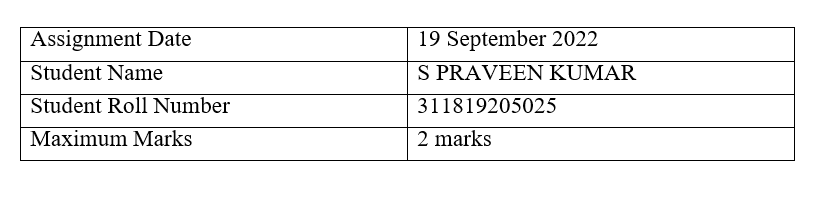

## Importing Required Libraries :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## LOADING THE GIVEN DATASET


In [ ]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.shape 
#checking the shape of the dataset

## 1.UNIVARIATE ANALYSIS

In [ ]:
#Histogram 
sns.histplot(df["Age"],color='purple')

In [ ]:
#Histogram on Categorical variables
sns.histplot(x='Age',data=df, hue=df['Tenure'])

In [ ]:
#Distplot
sns.displot(df["Age"],color='yellow') 

In [ ]:
#Boxplot
sns.boxplot(df["Age"],color='red') 

## 2.BIVARIATE ANALYSIS

In [ ]:
#Barplot
sns.barplot(df["Tenure"],df["Age"])

In [ ]:
#Linearplot
sns.lineplot(df["Age"],df["Tenure"], color='blue')

In [ ]:
#Scatterplot
sns.scatterplot(x=df.Age,y=df.RowNumber,color='green')

In [ ]:
#Regplot
sns.regplot(df['Age'],df['Tenure'],color='pink') 

## 3.MULTIVARIATE ANALYSIS

In [ ]:
#Pairplot
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]])

## 4.PERFORMING DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

## 5.HANDLING MISSING VALUES


In [ ]:
df.isnull().sum()

In [ ]:
#Since there are no missing values to be found we move on to find the outliers of the dataset

## 6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS

In [ ]:
outliers=df.quantile(q=(0.25,0.75))

In [ ]:
outliers

In [ ]:
# Finding inter-quartile range
q1 = df.CreditScore.quantile(0.25)
q3 = df.CreditScore.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR

In [ ]:
# Median values
df.median(numeric_only=True)

In [ ]:
#Replacing the outliers
df['CreditScore'] = np.where(df['CreditScore'] < lower_limit, 7, df['CreditScore'])
sns.boxplot(x=df.CreditScore)

## 7.CHECKING FOR CATEGORICAL COLUMNS AND PERFORMING ENCODING.

In [ ]:
df.head()
#Here we can see the presence of categorical columns such as Geography and Gender

In [ ]:
#Transforming Categorical columns into numerical values through labelencoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Geography = le.fit_transform(df.Geography)

df.head()

## 8.SPLITTING INTO INDEPENDENT(X) AND DEPENDENT(Y) VARIABLE

In [ ]:
y = df["Surname"]
y.head()

In [ ]:
x=df.drop(columns=["Surname"],axis=1)
x.head()

## 9.SCALING THE INDEPENDENT VARIABLES

In [ ]:
from sklearn.preprocessing import scale

X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

## 10.TRAINING AND TESTING SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [ ]:
X_Train.shape

In [ ]:
X_Test.shape

In [ ]:
Y_Train.shape

In [ ]:
Y_Test.shape

In [ ]:
X_Train.head()

In [ ]:
X_Test.head()

In [ ]:
Y_Train.head()

In [ ]:
Y_Test.head()